In [2]:
%matplotlib widget
from gsm_ve import GSM_VE
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Create instances of each class
pi_gsm_ve = GSM_VE()

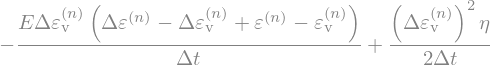

In [4]:
pi_gsm_ve.Pi_n1

In [5]:
pi_gsm_ve.data_dir

WindowsPath('C:/Users/adelpasand/bmcs_training_data/default_problem')

In [8]:
E_val = 30e+3  # Young's modulus in MPa
eta_val = 30e+6  # Viscosity modulus in Pa / s
mparams = (E_val, eta_val)
d_t_val = 0.01 # Time step in seconds
final_time = 20  # Final time in secondsfinal_time = 1

# Generate cyclic sinusoidal loading history
time_t = np.arange(0, final_time, d_t_val)
eps_t_2_cycles = 0.01 * np.sin(2 * np.pi * 1 * time_t / final_time)  # 2 cycles
eps_t_4_cycles = 0.01 * np.sin(2 * np.pi * 4 * time_t / final_time)  # 4 cycles

d_eps_t = np.diff(eps_t_2_cycles, axis=0)
d_t_t = np.diff(time_t, axis=0)
print(d_eps_t)

[3.14158749e-05 3.14155648e-05 3.14149447e-05 ... 3.14140145e-05
 3.14149447e-05 3.14155648e-05]


In [ ]:

E_val = 30e+3  # Young's modulus in MPa
eta_val = 30e+6  # Viscosity modulus in Pa / s
mparams = (E_val, eta_val)
d_t_val = 0.01 # Time step in seconds
final_time = 20  # Final time in secondsfinal_time = 1

# Generate cyclic sinusoidal loading history
time_t = np.arange(0, final_time, d_t_val)
eps_t_2_cycles = 0.01 * np.sin(2 * np.pi * 1 * time_t / final_time)  # 2 cycles
eps_t_4_cycles = 0.01 * np.sin(2 * np.pi * 4 * time_t / final_time)  # 4 cycles

d_eps_t = np.diff(eps_t_2_cycles, axis=0)
d_t_t = np.diff(time_t, axis=0)

# Compute responses for both loading histories using get_delta_Pi and get_ddelta_Pi_ddot_eps_v
# data_ipre_2 = perform_integration(ti_minp, pi_ipre, eps_t_2_cycles, time_t, *mparams)
# data_ipre_4 = perform_integration(ti_minp, pi_ipre, eps_t_4_cycles, time_t, *mparams)

# Compute responses for both loading histories using get_Pi and get_jac_Pi_ddot_eps_v
gsm_ve_data = pi_gsm_ve.perform_integration(eps_t_2_cycles, time_t, *mparams)


In [13]:

data = np.load("C:/Users/A_structure/bmcs_training_data/default_problem/Pi_data_default_problem.npy")

# Print shape and data type
print("Shape of the data:", data.shape)
print("Data type:", data.dtype)


Shape of the data: (1999, 5)
Data type: float64


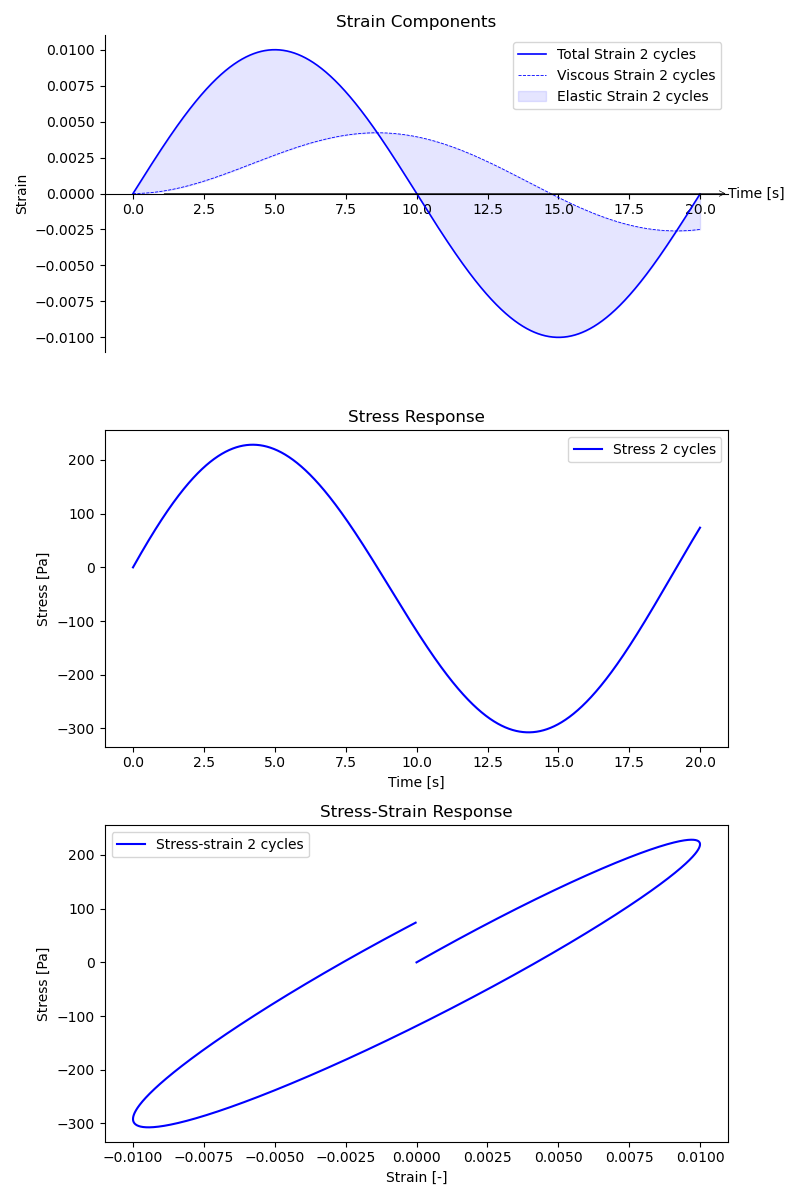

In [7]:
# Create the figure and axes
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))
fig.canvas.header_visible = False
# Plot the results for the two studies
pi_gsm_ve.plot_results(ax1, ax2, ax3, gsm_ve_data, '2 cycles', 'blue' )
fig.tight_layout()